## Imports

In [11]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [12]:
imdir = '/home/drevital/obstacles_classification_datasets/rgb_original_mistakes/fixed/classified_obstacle'
imname = '1_420_.93_2021-12-06--19-06-46_.jpg'
threshold = 60

# Read image & separate it to <ref, current>

In [13]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

## Generate diff & mask images

In [25]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)

# old morphological operations
copyImg = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)  # reduce noise
copyImg = cv2.dilate(copyImg, np.ones((7, 7), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)
copyImg = cv2.dilate(copyImg, np.ones((9, 9), np.uint8), iterations=1)
kernel = np.ones((11, 11), np.uint8)  # kernel for dilation

# increase area to an object
copyImg = cv2.dilate(copyImg, kernel, iterations=2)
copyImg = cv2.dilate(copyImg, np.ones((13, 13), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((11, 11), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)

mask = copyImg
 
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)        

## Concatenate <ref, current, mask> for training

In [26]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

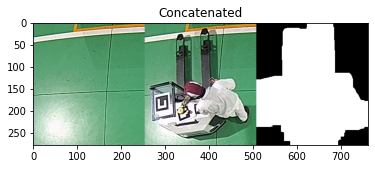

In [27]:
plt.imshow(concat)
plt.title('Concatenated')
plt.show()